In [2]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from glob import glob
import librosa


def make_data(datalist, feature='signal'):
    arr = []
    # signal data
    if feature == 'signal':
        for file in tqdm(datalist):
            # 16gb ram 기준
            # float32, sr = 22050 -> OOM
            # float32, sr = 16000 -> OOM
            # float32, sr = 11025 -> success
            x, sr = librosa.load(file, sr=11025)
            arr.append(x)

    # spectogam data
    elif feature == 'spectogram':
        for file in tqdm(datalist):
            x, sr = librosa.load(file, sr=11025)
            spec = librosa.stft(x)
            arr.append(spec.flatten())

    # MFCC data
    elif feature == 'MFCC':
        hop_size = int(22050/79)
        for file in tqdm(datalist):
            x, sr = librosa.load(file)
            mfcc = librosa.feature.mfcc(x, sr=sr, n_mfcc=80, fmax=3000,hop_length = hop_size)
            arr.append(mfcc.flatten())
            
    elif feature == 'mel-spectogram':
        hop_length = int(16000/125)
        for file in tqdm(datalist):
            x, sr = librosa.load(file,sr = 16000)
            d = librosa.feature.melspectrogram(y=x, sr=sr, n_mels = 126, hop_length = hop_length)
            DB = librosa.amplitude_to_db(d, ref=np.max)
            arr.append(DB.flatten())

    else:
        raise ValueError

    result = np.array(arr)

    return result

if __name__ == '__main__':
    raw_data = glob('./train/*.wav')
    mfcc = make_data(raw_data,feature='mel-spectogram')
    pd.DataFrame(mfcc).to_pickle('./x_trian_mel-spectogram.pickle')

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [10:21<00:00, 160.87it/s]


In [3]:
raw_tet = glob('./test/*.wav')
mfcc = make_data(raw_tet,feature='MFCC')
pd.DataFrame(mfcc).to_pickle('./x_test_mfcc_80.pickle')

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:52<00:00, 42.95it/s]


FileNotFoundError: [Errno 2] No such file or directory: './data/x_test_mfcc_80.pickle'

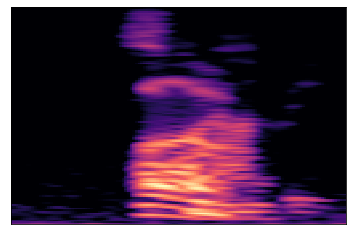

In [6]:
import librosa.display
hop_length = int(16000/125)
x, sr = librosa.load(glob('./train/*.wav')[0],sr = 16000)
d = librosa.feature.melspectrogram(y=x, sr=sr, n_mels = 126, hop_length = hop_length)
DB = librosa.amplitude_to_db(d, ref=np.max)
librosa.display.specshow(DB,sr=16000)

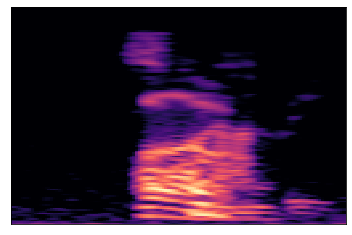

In [7]:
hop_length = int(22050/125)
x, sr = librosa.load(glob('./train/*.wav')[0],sr = 22050)
d = librosa.feature.melspectrogram(y=x, sr=sr, n_mels = 126, hop_length = hop_length)
DB = librosa.amplitude_to_db(d, ref=np.max)
librosa.display.specshow(DB,sr=22050)

In [1]:
def noising(data,noise_factor):
    noise = np.random.rand(len(data)) * noise_factor 
    augmented = data + noise
    return augmented

In [2]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from glob import glob
import librosa

def augmentation(data):
    from tqdm.notebook import tqdm
    new_data = []
    for i,cont in enumerate(tqdm(data)):
        hop_len =  int(22050/79)
        x, sr = librosa.load(cont)
        ran = np.random.randint(1,6)
        new_data.append(np.array(noising(x,(ran/10)),dtype = 'float32'))

    return pd.DataFrame(new_data)

if __name__ == '__main__':
    raw_data = glob('./train/*.wav')
    new_data  = augmentation(raw_data)
    new_data.to_pickle('drive/My Drive/data/x_trian_augmented_mel_spec.pickle')

KeyboardInterrupt: 

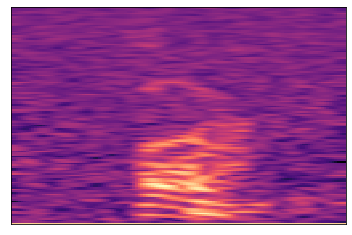

In [17]:
hop_length = int(16000/125)
x, sr = librosa.load(glob('./train/*.wav')[0],sr = 16000)
d = librosa.feature.melspectrogram(y=noising(x,0.4), sr=sr, n_mels = 126, hop_length = hop_length)
DB = librosa.amplitude_to_db(d, ref=np.max)
librosa.display.specshow(DB,sr=16000)

In [36]:
from scipy.io.wavfile import *
from scipy.io import wavfile
wavfile.write('./pitch.wav', 16000,np.array(noising(x,0.5),dtype = 'float32'))
wavfile.write('./pit.wav', 16000,x)